In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
from google.colab import drive 

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/Linear regression"

/content/drive/My Drive/Colab Notebooks/Linear regression


In [73]:
dataset = pd.read_csv('insurance1.csv')

In [74]:
dataset.head()

,age,sex,healthy,children,smoker,region
0,19,0,1,0,1,3
1,18,1,1,1,0,2
2,28,1,0,3,0,2
3,33,1,0,0,0,1
4,32,1,1,0,0,1


In [75]:
dataset.describe()

,age,sex,healthy,children,smoker,region
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,0.508621,1.091954,0.232759,1.497126
std,14.417015,0.500646,0.500646,1.192021,0.423198,1.104089
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,40.000000,1.000000,1.000000,1.000000,0.000000,2.000000
75%,53.000000,1.000000,1.000000,2.000000,0.000000,2.000000
max,64.000000,1.000000,1.000000,5.000000,1.000000,3.000000


In [76]:
dataset.shape

(348, 6)

In [77]:
X=dataset.iloc[:,:-2].values
Y=dataset.iloc[:,-2:-1].values


In [78]:
X

array([[19,  0,  1,  0],
       [18,  1,  1,  1],
       [28,  1,  0,  3],
       ...,
       [34,  0,  1,  3],
       [33,  1,  1,  2],
       [46,  1,  0,  1]])

In [79]:
Y

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

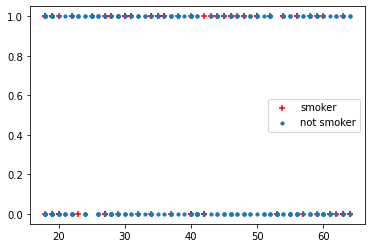

In [80]:
pos , neg = (Y==1).reshape(348,1) , (Y==0).reshape(348,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.legend(["smoker","not smoker"],loc=0)

In [81]:
def sigmoid(z):  #define sigmoid function
  return (1/(1+np.exp(-z)))

In [82]:
#feature Normalization
def feature_normalization(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X-mean)/std

    return X_norm,mean,std

In [83]:
def costfunction(theta,X,Y):
    m=len(Y)
    error=0
    for i in range(m):
        predictions=sigmoid(np.dot(X[i],theta))
        error=error+((Y[i]*np.log(predictions))-((1-Y[i])*np.log(1-predictions)))
    cost=1/m*error
    grad=1/m*np.dot(X.transpose(),(predictions-Y))  

    print(cost)
    return cost,grad

In [84]:
m,n=X.shape[0],X.shape[1]
X_Norm,X_mean,X_std=feature_normalization(X)
X=np.append(np.ones((m,1)),X_Norm,axis=1)
Y=Y.reshape(m,1)
initial_theta=np.zeros((n+1,1))
costfunction(initial_theta,X,Y)

[0.37047522]


(array([0.37047522]), array([[ 0.26724138],
        [ 0.00458058],
        [-0.0620881 ],
        [ 0.00113969],
        [ 0.0010822 ]]))

In [85]:
def gradientDescent(X,Y,theta,alpha,num_iters):
  m=len(Y)
  cost_function_values=[]

  for i in range(num_iters):
    cost,grad=costfunction(theta,X,Y)
    cost_function_values.append(cost)
    theta=theta-(alpha*grad)

    if(i%10==0):
      plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+")
      plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="o")
      x_value=np.array([np.min(X[:,1]),np.max(X[:,1])])
      y_value=-(theta[0]+theta[1]*x_value)/theta[2]
      plt.legend(["smoker","Not smoker"],loc=0)
      plt.plot(x_value,y_value,"g")
      
      plt.show()
  x=np.arange(0,len(cost_function_values),step=1)
  plt.plot(x,cost_function_values,"-b")
  plt.xlabel("number of iteration")
  plt.ylabel("Cost/loss values")
  plt.title("cost Function curve")
  plt.show()
  return theta,cost_function_values

[0.37047522]


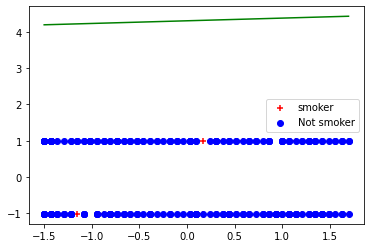

[0.30505131]
[0.248375]
[0.19900657]
[0.15574722]
[0.11760773]
[0.08377499]
[0.05358104]
[0.02647611]
[0.00200623]
[-0.02020499]


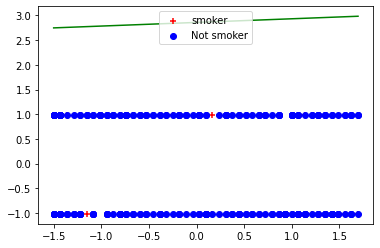

[-0.04047114]
[-0.05905478]
[-0.07617683]
[-0.09202412]
[-0.10675542]
[-0.12050628]
[-0.13339294]
[-0.14551552]
[-0.15696058]
[-0.16780327]


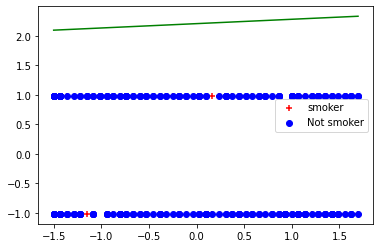

[-0.17810904]
[-0.18793509]
[-0.19733157]
[-0.20634258]
[-0.21500703]
[-0.22335928]
[-0.23142983]
[-0.23924575]
[-0.24683115]
[-0.25420753]


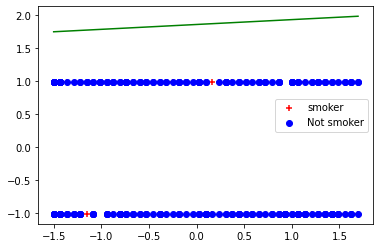

[-0.26139414]
[-0.2684082]
[-0.27526516]
[-0.28197892]
[-0.288562]
[-0.29502566]
[-0.3013801]
[-0.30763453]
[-0.31379728]
[-0.31987593]


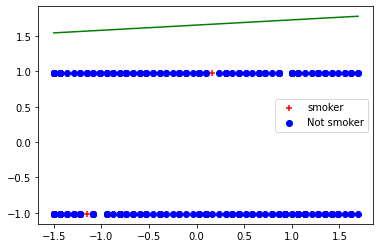

[-0.32587734]
[-0.33180776]
[-0.33767285]
[-0.3434778]
[-0.34922733]
[-0.35492574]
[-0.36057698]
[-0.36618464]
[-0.37175202]
[-0.37728215]


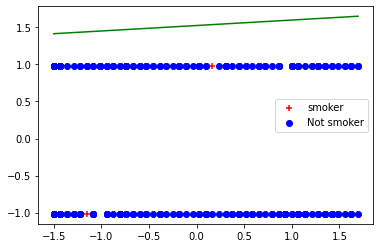

[-0.3827778]
[-0.38824152]
[-0.39367563]
[-0.3990823]
[-0.4044635]
[-0.40982105]
[-0.41515664]
[-0.4204718]
[-0.42576798]
[-0.43104649]


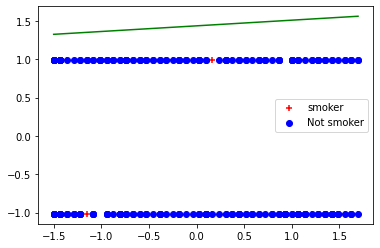

[-0.43630855]
[-0.44155528]
[-0.44678774]
[-0.45200688]
[-0.4572136]
[-0.46240874]
[-0.46759305]
[-0.47276726]
[-0.47793201]
[-0.48308794]


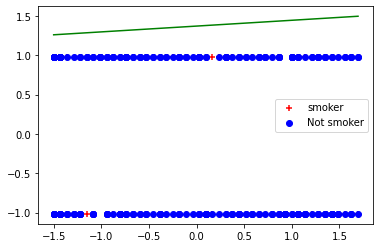

[-0.48823561]
[-0.49337555]
[-0.49850825]
[-0.50363418]
[-0.50875376]
[-0.51386738]
[-0.51897543]
[-0.52407824]
[-0.52917614]
[-0.53426943]


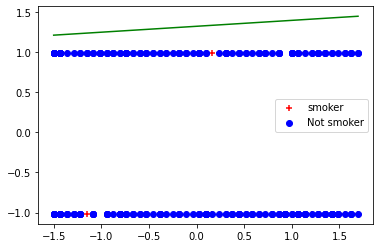

[-0.53935838]
[-0.54444327]
[-0.54952432]
[-0.55460177]
[-0.55967584]
[-0.56474672]
[-0.56981459]
[-0.57487964]
[-0.57994201]
[-0.58500187]


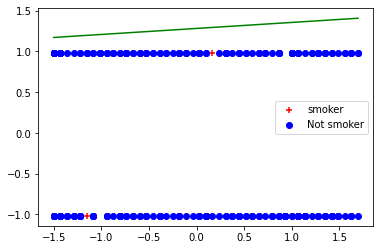

[-0.59005936]
[-0.59511461]
[-0.60016773]
[-0.60521886]
[-0.61026809]
[-0.61531554]
[-0.62036128]
[-0.62540543]
[-0.63044805]


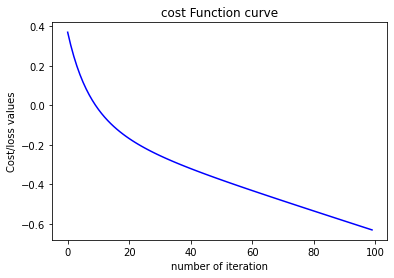

In [86]:
theta,costfunction=gradientDescent(X,Y,initial_theta,0.5,100)